## <font color=green> Normalização e Padronização de dados

In [1]:
import pandas as pd

In [2]:
wine_data = pd.read_csv("datasets/wine.csv")

In [3]:
wine_data.head()

,Class,Alcohol,Malic
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


- Vamos explorar cada coluna em detalhe

<Axes: >

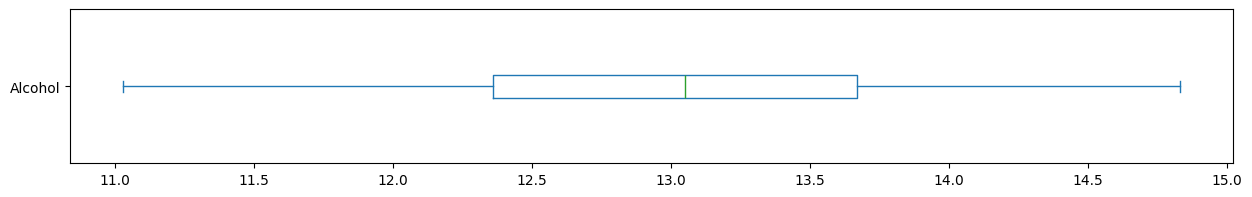

In [4]:
wine_data['Alcohol'].plot.box(vert=False, figsize=(15,2))

- Podemos observar que os valores da *feature Alcohol* varia aproximadamente de 11 à 15 

In [5]:
wine_data['Alcohol'].describe()

count    177.000000
mean      12.993672
std        0.808808
min       11.030000
25%       12.360000
50%       13.050000
75%       13.670000
max       14.830000
Name: Alcohol, dtype: float64

- Claramente podemos visualizar que o valor mínimo é 11.03 e o valor máximo é 14.83

<Axes: >

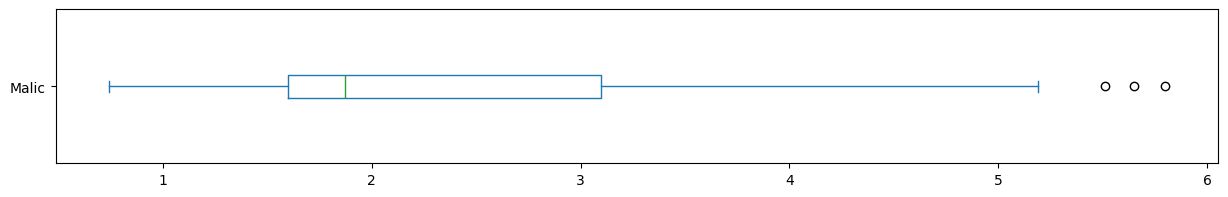

In [6]:
wine_data['Malic'].plot.box(vert=False, figsize=(15,2))

- Podemos observar também que os valores da *feature Malic* varia aproximadamente de 1 à 6 com poucos outliers

In [7]:
wine_data['Malic'].describe()

count    177.000000
mean       2.339887
std        1.119314
min        0.740000
25%        1.600000
50%        1.870000
75%        3.100000
max        5.800000
Name: Malic, dtype: float64

- Claramente podemos visualizar que o valor mínimo é 0.74 e o valor máximo é 5.8

- Alterar a escala da *feature* muitas vezes é essencial para uma melhor visualização dos dados. Além disso, com algumas exceções, algoritmos de *Machine Learning* não performam bem quando os dados estão em diferentes escalas.

### Aplicando Normalização

- Normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1. A normalização dos dados é feita usando Min-Max:

$$ x_{changed} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

- Nomalização pode ser calculada utilizando *MinMaxScaler* da biblioteca scikit-learn

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax_scale = MinMaxScaler(feature_range=(0,1)) # O parâmetro feature_range=(0,1) é o default
df_minmax = minmax_scale.fit_transform(wine_data[['Alcohol', 'Malic']])

In [10]:
print('Valor mínimo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nValor máximo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Valor mínimo depois de normalizar:
Alcohol=0.00, Malic acid=0.00

Valor máximo depois de normalizar:
Alcohol=1.00, Malic acid=1.00


### Aplicando Padronização

- Padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Normalmente é feita usando a fórmula z-score:

$$ z = \frac{x - \mu}{\sigma} $$

- Padronização pode ser calculada utilizando *StandardScaler* da biblioteca scikit-learn

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std_scale = StandardScaler()
df_std = std_scale.fit_transform(wine_data[['Alcohol', 'Malic']])

In [13]:
print('Média dos valores depois de padronizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nDesvio padrão dos valores depois de padronizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Média dos valores depois de padronizar:
Alcohol=-0.00, Malic acid=0.00

Desvio padrão dos valores depois de padronizar:
Alcohol=1.00, Malic acid=1.00


### Comparando os resultados

In [14]:
wine_data_normalized = wine_data.copy()
wine_data_normalized['Alcohol'] = df_minmax[:,0]
wine_data_normalized['Malic'] = df_minmax[:,1]

In [15]:
wine_data_standardized = wine_data.copy()
wine_data_standardized['Alcohol'] = df_std[:,0]
wine_data_standardized['Malic'] = df_std[:,1]

<Axes: title={'center': 'Input scale'}, xlabel='Alcohol', ylabel='Malic'>

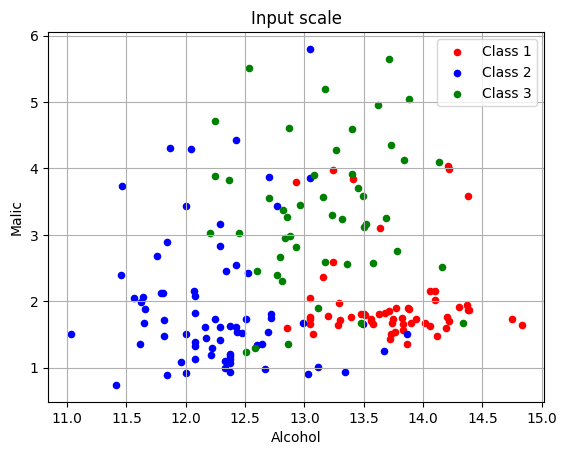

In [16]:
ax = wine_data[wine_data['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine_data[wine_data['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine_data[wine_data['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Input scale")

<Axes: title={'center': 'Normalized'}, xlabel='Alcohol', ylabel='Malic'>

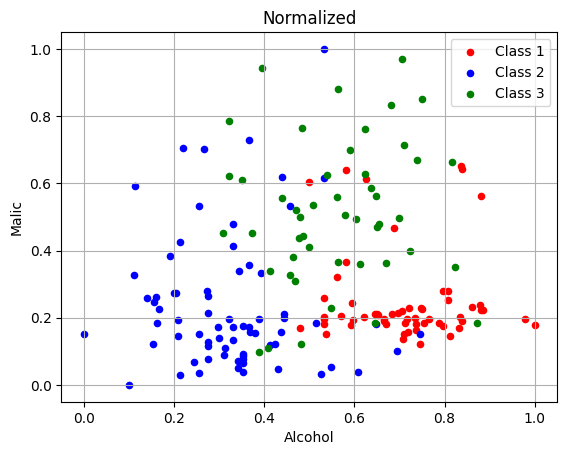

In [17]:
ax = wine_data_normalized[wine_data_normalized['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine_data_normalized[wine_data_normalized['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine_data_normalized[wine_data_normalized['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Normalized")

<Axes: title={'center': 'Standardized'}, xlabel='Alcohol', ylabel='Malic'>

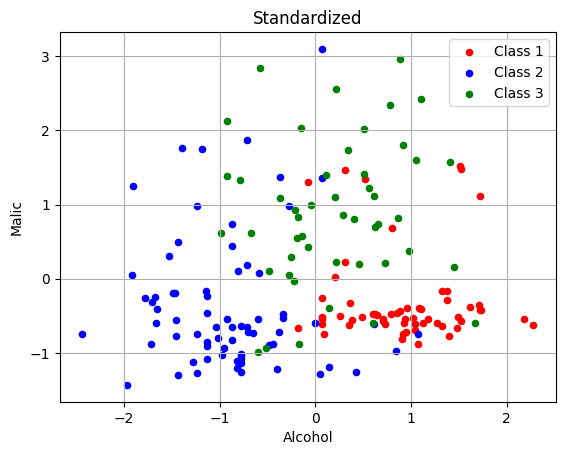

In [18]:
ax = wine_data_standardized[wine_data_standardized['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine_data_standardized[wine_data_standardized['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine_data_standardized[wine_data_standardized['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Standardized")

- No **"*Input scale*"**, os valores da *feature alcohol* variam entre 11 e 15, e da *feature malic* entre 0 e 6
- No **"*Normalized*"**, ambos os valores da *feature alcohol* e *feature malic* entre 0 e 1
- No **"*Standardized*"**, ambos os valores da *feature alcohol* e *feature malic* estão centralizados em 0

- A padronização de dados pode ser um problema para alguns algoritmos de *Machine Learning* (*e.g.*, redes neurais geralmente performam melhor com dados de entrada no intervalo de 0 e 1)
- Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada
- Contudo, a padronização de dados é menos afetada por outliers

## <font color=green> Tipos de dados e ferramentas para data e hora

- A biblioteca-padrão de Python inclui tipos de dados para data e horas, assim como funcionalidades relacionadas ao calendário.
- Os módulos datetime, time e calendar são os principais
- datetime é amplamente utilizado

In [19]:
from datetime import datetime

In [20]:
now = datetime.now()
now

datetime.datetime(2025, 10, 20, 12, 23, 31, 441492)

In [21]:
now.year, now.month, now.day

(2025, 10, 20)

- datetime armazena tanto a data quanto a hora, até o nível de microssegundos. timedelta representa a diferença de tempo entre dois objetos datetime

In [22]:
delta = now - datetime(2011, 7, 15)
delta

datetime.timedelta(days=5211, seconds=44611, microseconds=441492)

In [23]:
delta.days

5211

In [24]:
delta.seconds

44611

- Podemos somar um timedelta ou um múltiplo dele a um objeto datetime (ou subtrair desse objeto), o que resultará em um novo objeto deslocado

In [25]:
from datetime import timedelta

In [26]:
start = datetime(2011, 7, 15)

- Somando 12 dias

In [27]:
start + timedelta(12)

datetime.datetime(2011, 7, 27, 0, 0)

### Conversão entre string e datetime

- Podemos formatar objetos datetime e objetos Timestamp do pandas como strings, usando str ou o método strftime, passando uma especificação de formato

In [28]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [29]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

- Podemos usar esses mesmos códigos de formato para converter strings em datas usando datetime.strptime

In [30]:
value = '2021-07-10'

In [31]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2021, 7, 10, 0, 0)

In [32]:
date_lst = ['7/7/2021', '15/7/2021']

In [33]:
[datetime.strptime(x, '%d/%m/%Y') for x in date_lst]

[datetime.datetime(2021, 7, 7, 0, 0), datetime.datetime(2021, 7, 15, 0, 0)]

- Podemos usar também o método parser.parse do pacote de terceitos dateutil

In [34]:
from dateutil.parser import parse

In [35]:
parse('2021-01-03')

datetime.datetime(2021, 1, 3, 0, 0)

- Ele é capaz de fazer parse da maior parte das representações de data legíveis aos seres humanos

In [36]:
parse('Jan 31, 2019 10:45 PM')

datetime.datetime(2019, 1, 31, 22, 45)

- Fora dos Estados Unidos, o dia estar antes do mês é bem comum, portanto podemos passar dayfirst=True para sinalizar esse fato

In [37]:
parse('6/12/2020', dayfirst=True)

datetime.datetime(2020, 12, 6, 0, 0)

- O parse também lida com valores que devam ser indicativos de dados ausentes (None, string vazia, etc.)

In [38]:
idx = pd.to_datetime(date_lst+[None], dayfirst=True)

In [39]:
idx

DatetimeIndex(['2021-07-07', '2021-07-15', 'NaT'], dtype='datetime64[ns]', freq=None)

In [40]:
idx[2]

NaT

- NaT (Not a Time) é o valor nulo do pandas para dados de timestamp

In [41]:
pd.isnull(idx)

array([False, False,  True])